In [1]:
#Se importaron las librearías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy
from scipy.fftpack import fft,fftfreq, fftshift

In [2]:
#Se leyó el archivo separado en comas y se le asignaron nombre a las columnas
df=pd.read_csv("FortPoint.csv",parse_dates=['Date Time'],header=int(0))
df.columns=['Date Time','Water Level','Sigma','O','F','R','L','Quality']

In [3]:
#Se utilizará solo el valor absoluto del nivel del agua, se observa el final del archivo para ver cuantos datos contiene
df1=df.loc[abs(df['Water Level']) < 0.09]
df.tail()

,Date Time,Water Level,Sigma,O,F,R,L,Quality
7435,2016-04-26 23:30:00,0.792,0.009,0,0,0,0,v
7436,2016-04-26 23:36:00,0.763,0.005,0,0,0,0,v
7437,2016-04-26 23:42:00,0.721,0.009,0,0,0,0,v
7438,2016-04-26 23:48:00,0.674,0.005,0,0,0,0,v
7439,2016-04-26 23:54:00,0.654,0.005,0,0,0,0,v


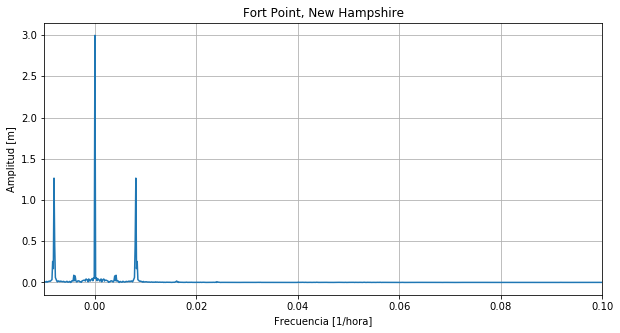

In [4]:
#Ahora se aplica la función de la transformada de Fourier
N_d = 7440
T = 1.0
y = df["Water Level"] 
yf = fft(y)
xf = fftfreq(N_d, T)
xf = fftshift(xf)
yplot = fftshift(yf)

graf = plt.plot(xf, 2.0/N_d *abs(yplot))
plt.xlim(-0.01,0.1)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]')
plt.ylabel('Amplitud [m]')
plt.title('Fort Point, New Hampshire')

fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

In [6]:
#Se buscan algunos máximos
a= np.absolute(yf/7440)
a[a[:,] > 0.05]

print(np.where(a[:,]>0.1))
b= a[a[:,]>0.05]
b

(array([   0,   59,   60,   62, 7378, 7380, 7381], dtype=int64),)


array([ 1.49825739,  0.22619249,  0.63253858,  0.08378883,  0.12706267,
        0.12706267,  0.08378883,  0.63253858,  0.22619249])

In [7]:
#Resulta ser que hay tres valores cercanos (59, 60 y 62), así que se usarán esos.
#Ahora buscaremos la amplitud, frecuencia y periodo de esos puntos
print( 'Primer Armónico notorio')
print('Amplitud=',np.absolute(yf[59,]/7440))
print('frecuencia=', xf[int(3720+59),])
print('periodo=', 1/xf[int(3720+59),])

print('Segundo Armónico notorio')
print('Amplitud=',np.absolute(yf[60,]/7440))
print('frecuencia=', xf[int(3720+60),])
print('periodo=', 1/xf[int(3720+60),])

print('Tercer Armónico notorio')
print('Amplitud=',np.absolute(yf[62,]/7440))
print('frecuencia=', xf[int(3720+62),])
print('periodo=', 1/xf[int(3720+62),])

Primer Armónico notorio
Amplitud= 0.226192493208
frecuencia= 0.00793010752688
periodo= 126.101694915
Segundo Armónico notorio
Amplitud= 0.6325385831
frecuencia= 0.00806451612903
periodo= 124.0
Tercer Armónico notorio
Amplitud= 0.127062666561
frecuencia= 0.00833333333333
periodo= 120.0


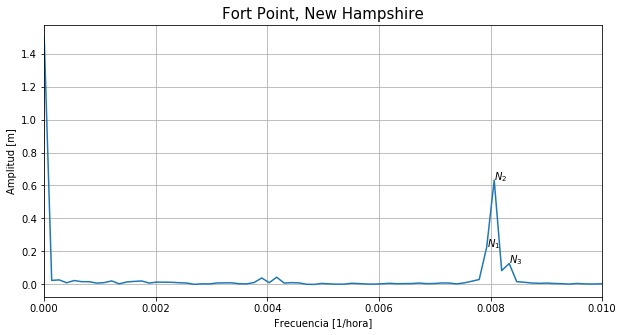

In [8]:
#Por último se configura la gráfica y se muestra
fig = plt.gcf()
fig.set_size_inches(10, 5)


graf = plt.plot(xf, 1.0/7440 *abs(yplot))
plt.xlim(-0,0.01)
plt.grid(True)

plt.xlabel('Frecuencia [1/hora]')
plt.ylabel('Amplitud [m]')
plt.title('Fort Point, New Hampshire', fontsize=15)

plt.text(0.00793010752688,0.226192493208, '$N_1$')
plt.text(0.00806451612903,0.6325385831, '$N_2$')
plt.text(0.00833333333333,0.127062666561, '$N_3$')


plt.show()